In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import re

In [4]:
import sklearn

In [83]:
import seaborn as sns

In [84]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

In [8]:
import warnings

In [9]:
warnings.filterwarnings('ignore')

In [10]:
from collections import Counter

In [153]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [148]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split

In [13]:
from sklearn.feature_selection import SelectFromModel, SelectKBest

In [14]:
from sklearn.pipeline import make_pipeline

In [15]:
from sklearn.model_selection import StratifiedKFold

In [16]:
from sklearn.model_selection import cross_val_score

In [207]:
from imblearn.over_sampling import RandomOverSampler

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
sns.set(style='white', context='notebook', palette='deep')

In [19]:
pd.options.display.max_columns = 100

In [190]:
df = pd.read_csv('D:\Datasets\\Dataset\\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [192]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [194]:
df.isnull().sum()*100/df.shape[0]

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [195]:
dt = list(df[((df.isnull().sum(axis=1)/df.shape[1])*100)>5].index)
print(dt)

[]


In [71]:
!pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 5.4 MB/s eta 0:00:00


In [72]:
!pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 1.7 MB/s eta 0:00:00


In [74]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

In [151]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [76]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, RandomForestRegressor
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor

In [281]:
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import f_regression
from sklearn.decomposition import PCA

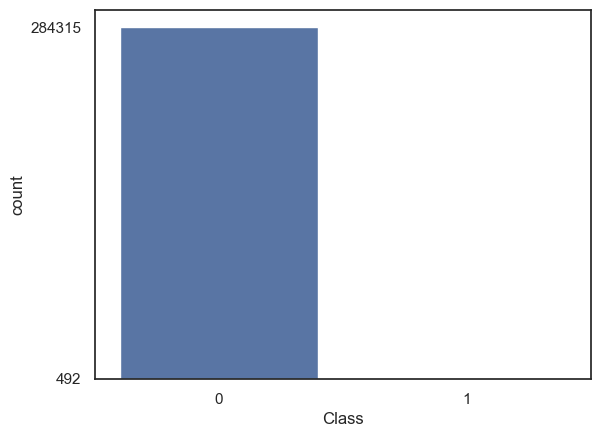

In [197]:
sns.countplot(data=df,x="Class")
count = df["Class"].value_counts()
plt.yticks(count)
plt.show()

In [198]:
sc = StandardScaler()
amount = df['Amount'].values
df['Amount'] = sc.fit_transform(amount.reshape(-1,1))


In [199]:
df.drop(['Time'],axis=1,inplace=True)

In [200]:

df.shape

(284807, 30)

In [201]:
df.drop_duplicates(inplace=True)

In [202]:
df.shape

(275663, 30)

In [108]:
from sklearn.preprocessing import StandardScaler

In [203]:
X = df.drop('Class',axis=1).values
Y = df['Class'].values

In [204]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=1)

In [208]:
ros = RandomOverSampler()

In [209]:
X_train1,Y_train1 = ros.fit_resample(X_train,Y_train)

In [210]:
X_test1,Y_test1 = ros.fit_resample(X_test,Y_test)

In [211]:
lr = LogisticRegression()

In [126]:
X_train , X_test ,y_train , y_test = train_test_split(X,y,test_size = 0.2 ,random_state = 42 ,stratify=y)

In [212]:
lr = create_model(lr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     68788
           1       0.82      0.56      0.67       128

    accuracy                           1.00     68916
   macro avg       0.91      0.78      0.83     68916
weighted avg       1.00      1.00      1.00     68916

Confusion Matrix :
[[68772    16]
 [   56    72]]


In [213]:
lr.fit(X_train1,Y_train1)

LogisticRegression()

In [214]:
Y_pred = lr.predict(X_test1)

In [215]:
print(classification_report(Y_test1,Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     68788
           1       0.97      0.91      0.94     68788

    accuracy                           0.94    137576
   macro avg       0.94      0.94      0.94    137576
weighted avg       0.94      0.94      0.94    137576



In [216]:
def create_model1(model1):
    model1.fit(X_train1,Y_train1)
    Y_pred1=model1.predict(X_test1)
    print(classification_report(Y_test1,Y_pred1))
    print('Confustion Matrix')
    print(confusion_matrix(Y_test1,Y_pred1))
    return model1

In [217]:
lr = LogisticRegression()

In [218]:
lr = create_model1(lr)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     68788
           1       0.97      0.91      0.94     68788

    accuracy                           0.94    137576
   macro avg       0.94      0.94      0.94    137576
weighted avg       0.94      0.94      0.94    137576

Confustion Matrix
[[67177  1611]
 [ 6421 62367]]


In [219]:
dt = DecisionTreeClassifier()

In [220]:
dt = create_model1(dt)

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     68788
           1       1.00      0.70      0.83     68788

    accuracy                           0.85    137576
   macro avg       0.89      0.85      0.85    137576
weighted avg       0.89      0.85      0.85    137576

Confustion Matrix
[[68763    25]
 [20398 48390]]


In [221]:
dt1 = DecisionTreeClassifier(max_depth=4,criterion="entropy") 

In [222]:
dt1 = create_model1(dt1)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     68788
           1       0.93      0.86      0.89     68788

    accuracy                           0.90    137576
   macro avg       0.90      0.90      0.90    137576
weighted avg       0.90      0.90      0.90    137576

Confustion Matrix
[[64286  4502]
 [ 9578 59210]]


In [223]:
lr = LogisticRegression()
dt2 = DecisionTreeClassifier()
dt3 = DecisionTreeClassifier(criterion="entropy")

In [224]:
model_list=[('Logistic',lr),('Decision_Tree_Gini',dt2),('Decision_Tree_Entropy',dt3)]

In [225]:
vc1 = VotingClassifier(estimators=model_list)

In [226]:
model = create_model1(vc1)

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     68788
           1       1.00      0.76      0.86     68788

    accuracy                           0.88    137576
   macro avg       0.90      0.88      0.88    137576
weighted avg       0.90      0.88      0.88    137576

Confustion Matrix
[[68763    25]
 [16599 52189]]


In [227]:
vc2 = VotingClassifier(estimators=model_list,voting="soft")

In [228]:
model = create_model1(vc2)

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     68788
           1       1.00      0.76      0.86     68788

    accuracy                           0.88    137576
   macro avg       0.90      0.88      0.88    137576
weighted avg       0.90      0.88      0.88    137576

Confustion Matrix
[[68759    29]
 [16599 52189]]


In [229]:
bc = BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=50,random_state=1)

In [230]:
model = create_model1(bc)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     68788
           1       0.98      0.88      0.92     68788

    accuracy                           0.93    137576
   macro avg       0.93      0.93      0.93    137576
weighted avg       0.93      0.93      0.93    137576

Confustion Matrix
[[67410  1378]
 [ 8530 60258]]


In [231]:
bc1 = BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=500,random_state=1,bootstrap=False)

In [232]:
model = create_model1(bc1)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     68788
           1       0.97      0.91      0.94     68788

    accuracy                           0.94    137576
   macro avg       0.94      0.94      0.94    137576
weighted avg       0.94      0.94      0.94    137576

Confustion Matrix
[[67043  1745]
 [ 6447 62341]]


In [233]:
rf = RandomForestClassifier(max_depth = 4)

In [234]:
rf = create_model1(rf)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     68788
           1       1.00      0.83      0.91     68788

    accuracy                           0.91    137576
   macro avg       0.93      0.91      0.91    137576
weighted avg       0.93      0.91      0.91    137576

Confustion Matrix
[[68562   226]
 [11662 57126]]


In [235]:
lr = LogisticRegression()
dt2 = DecisionTreeClassifier() # by-default Gini Index
dt3 = DecisionTreeClassifier(criterion="entropy")

In [236]:
model_list = [lr,dt1,dt2]

In [237]:
meta = LogisticRegression()

In [238]:
sc = StackingClassifier(classifiers=model_list,meta_classifier=meta)

In [239]:
model = create_model1(sc)

              precision    recall  f1-score   support

           0       0.76      1.00      0.86     68788
           1       1.00      0.69      0.81     68788

    accuracy                           0.84    137576
   macro avg       0.88      0.84      0.84    137576
weighted avg       0.88      0.84      0.84    137576

Confustion Matrix
[[68764    24]
 [21509 47279]]


In [240]:
ada = AdaBoostClassifier(n_estimators=100)

In [241]:
model = create_model1(ada)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     68788
           1       0.99      0.86      0.92     68788

    accuracy                           0.93    137576
   macro avg       0.93      0.93      0.93    137576
weighted avg       0.93      0.93      0.93    137576

Confustion Matrix
[[68250   538]
 [ 9504 59284]]


In [242]:
xgb = XGBClassifier(max_depth = 4)

In [243]:
xgb = create_model1(xgb)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     68788
           1       1.00      0.78      0.87     68788

    accuracy                           0.89    137576
   macro avg       0.91      0.89      0.89    137576
weighted avg       0.91      0.89      0.89    137576

Confustion Matrix
[[68773    15]
 [15447 53341]]


In [244]:
svc = LinearSVC(random_state=3)

In [245]:
svc = create_model1(svc)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     68788
           1       0.98      0.91      0.95     68788

    accuracy                           0.95    137576
   macro avg       0.95      0.95      0.95    137576
weighted avg       0.95      0.95      0.95    137576

Confustion Matrix
[[67353  1435]
 [ 5870 62918]]


In [246]:
svc = LinearSVC(random_state=1,C=0.05)

In [247]:
svc=create_model1(svc)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     68788
           1       0.98      0.91      0.95     68788

    accuracy                           0.95    137576
   macro avg       0.95      0.95      0.95    137576
weighted avg       0.95      0.95      0.95    137576

Confustion Matrix
[[67452  1336]
 [ 5870 62918]]


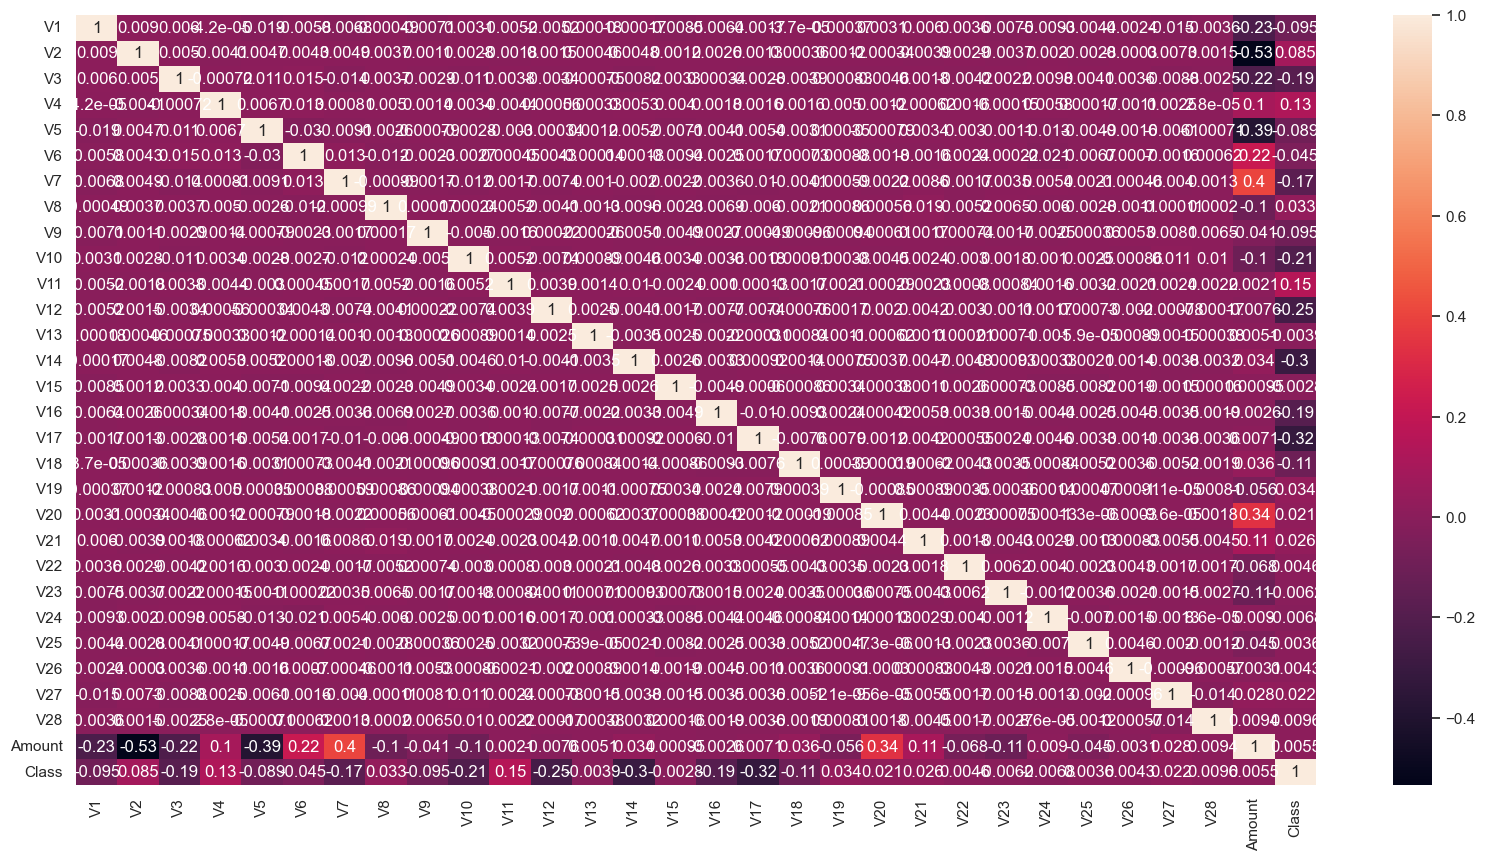

In [248]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [249]:
anova = SelectKBest(score_func=f_regression,k=15)

In [250]:
X_train_imp = anova.fit_transform(X_train1,Y_train1)
X_test_imp = anova.transform(X_test1)

In [251]:
anova.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [252]:
lr1=LinearRegression()

In [253]:
lr1.fit(X_train_imp,Y_train1)

LinearRegression()

In [254]:
lr1.score(X_test_imp,Y_test1)

0.6104766962979933

In [255]:
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.338556,0
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.333279,0
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,-0.190107,0
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.019392,0
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.338516,0


In [256]:
X = df.drop('Class',axis=1) #input variable
Y = df['Class']

In [257]:
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [258]:
columns = []
for col in X:
    columns.append(col)
    print(columns)

['V1']
['V1', 'V2']
['V1', 'V2', 'V3']
['V1', 'V2', 'V3', 'V4']
['V1', 'V2', 'V3', 'V4', 'V5']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17']
['V1', 'V2', 'V3', 'V4', 'V5'

In [259]:
columns = []
for col in X:
    columns.append(col)
    X_new = df[columns]
    X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_new,Y,test_size=0.3,random_state=1)
    lr = LinearRegression()
    lr.fit(X_train1,Y_train1)
    score = lr.score(X_test1,Y_test1)
    print('Column : ',col, ' Score : ',score)

Column :  V1  Score :  0.008049906445355859
Column :  V2  Score :  0.014829607693038871
Column :  V3  Score :  0.04502740013687734
Column :  V4  Score :  0.06019298100028847
Column :  V5  Score :  0.06522999576923494
Column :  V6  Score :  0.0680427439509651
Column :  V7  Score :  0.09684045771734884
Column :  V8  Score :  0.09718457050136098
Column :  V9  Score :  0.10542103493340127
Column :  V10  Score :  0.1460189194123266
Column :  V11  Score :  0.1641484840016324
Column :  V12  Score :  0.22215649325142672
Column :  V13  Score :  0.22216008661679054
Column :  V14  Score :  0.309488820516705
Column :  V15  Score :  0.30949873863221244
Column :  V16  Score :  0.34223496499037975
Column :  V17  Score :  0.4375220767652669
Column :  V18  Score :  0.4488758376098295
Column :  V19  Score :  0.449713406048721
Column :  V20  Score :  0.45007430865849674
Column :  V21  Score :  0.45113855287094196
Column :  V22  Score :  0.4511456397536001
Column :  V23  Score :  0.45115701418291365
Colum

In [260]:
columns = []
X_new = X
n_col = X_new.shape[1]
for i in range(n_col,0,-1): 
    columns.append(X_new)
    X_train1,X_test1,y_train1,y_test1 = train_test_split(X_new,Y,test_size=0.3,random_state=1)
    lr = LinearRegression()
    lr.fit(X_train1,y_train1)
    score1 = lr.score(X_test1,y_test1)
    print('Column : ',i, 'Score : ',score1)
    X_new = X_new.iloc[:,:-1]
    print('After Remove Column : ', i)

Column :  29 Score :  0.45182699027318207
After Remove Column :  29
Column :  28 Score :  0.451510022390316
After Remove Column :  28
Column :  27 Score :  0.4514188657712783
After Remove Column :  27
Column :  26 Score :  0.4512551616437064
After Remove Column :  26
Column :  25 Score :  0.45123373598424366
After Remove Column :  25
Column :  24 Score :  0.451215008019615
After Remove Column :  24
Column :  23 Score :  0.45115701418291365
After Remove Column :  23
Column :  22 Score :  0.4511456397536001
After Remove Column :  22
Column :  21 Score :  0.45113855287094196
After Remove Column :  21
Column :  20 Score :  0.45007430865849674
After Remove Column :  20
Column :  19 Score :  0.449713406048721
After Remove Column :  19
Column :  18 Score :  0.4488758376098295
After Remove Column :  18
Column :  17 Score :  0.4375220767652669
After Remove Column :  17
Column :  16 Score :  0.34223496499037975
After Remove Column :  16
Column :  15 Score :  0.30949873863221244
After Remove Colu

In [261]:
lr = LinearRegression()

In [262]:
lr.fit(X_train1,Y_train1)

LinearRegression()

In [263]:
training_score = lr.score(X_train1,Y_train1)
print('Training Score : ',training_score)

Training Score :  0.009376512025333739


In [264]:
testing_score = lr.score(X_test1,Y_test1)
print('Testing Score : ',testing_score)

Testing Score :  0.008049906445355859


In [265]:
m = lr.coef_
m = np.round(m,2)
print(m)

[-0.]


In [266]:
lr.intercept_

0.0016287509182190832

In [267]:
l1 = Lasso(1000)
l1.fit(X_train1,Y_train1)

Lasso(alpha=1000)

In [268]:
l1.coef_

array([-0.])

In [269]:
m = lr.coef_
a  =[]
for i in m:
    i = np.round(i,2)
    a.append(i)
print(a)

[-0.0]


In [270]:
m1 = l1.coef_
b = []
for i in m1:
    i = np.round(i,3)
    b.append(i)
print(b)

[-0.0]


In [271]:
c = X.columns
L = list(zip(c,a,b))

df1 = pd.DataFrame(L, columns=['Column','Original_Slope','Lasso_Slope'])
df1

,Column,Original_Slope,Lasso_Slope
0,V1,-0.0,-0.0


In [272]:
print('Score : ')
for i in range(200,1001,50):
    l1 = Lasso(i)
    l1.fit(X_train1,Y_train1)
    score = l1.score(X_test1,Y_test1)
    print(np.round(score,2))

Score : 
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0


In [273]:
pca = PCA(n_components=1,random_state=1)
X_train_pca = pca.fit_transform(X_train1,Y_train1)

In [274]:
X_test_pca = pca.transform(X_test1)

In [275]:
lr = LinearRegression()

In [276]:
lr.fit(X_train_pca,Y_train1)

LinearRegression()

In [277]:
lr.score(X_test_pca,Y_test1)

0.008049906445355859